#Interpolacja

In [ ]:
image = np.load('/content/pandas.npy')

io.imshow(image)

In [ ]:
green = image[:, :, 1]
red = image[:, :, 0]
blue = image[:, :, 2]

In [ ]:
#Poszczególne kanały przypisujemy do zmiennej
green = image[:, :, 1]
red = image[:, :, 0]
blue = image[:, :, 2]

In [ ]:
#Stworzenie 1 wymiarowej tablicy, która zawiera liczby od 0 do 9
#i następnie wybierany jest co drugi element
#result: array([1, 3, 5, 7, 9])
np.arange(10)[1::2]

In [ ]:
to_interp = green
#Wybieramy co drugi wiersz z tablicy green (wszystkie kolumny są uwzględnione)
to_interp = green[::2,:]
#Wybieramy co drugą kolumne z tablicy
to_interp = to_interp[:, ::2]
#Rezultetm jest tabliza zawierająca co drugi wiersz i co drugą kolumnę  q

In [ ]:
#Tworzymy liniowe jądro interpolacji
def linear_kernel(x, offset: float, width: float):
    return (1 - np.abs((x - offset) / width)) * (np.abs((x - offset) / width) < 1)

In [ ]:
#Tworzymy jednowymiarową tablice od -3 do 3
# zawierającą równo rozłożone 1000 punktów
x = np.linspace(-3, 3, 1000)
y = linear_kernel(x, offset=0.0, width=1)

to_interp[0].shape

In [ ]:
#Definujemy funkcję interpolującą wiersz
def interpolate_row(row):
  #Tworzymy pustą tablicę kernels
    kernels = []

  #Tworzymy jednowymiarową listę od 0 do 1, z ilością punktów 2* długość(przyjęty argument row)
  #(chcemy uzyskać gęstsze próbkowanie niż oryginalne wartości w row)
    space = np.linspace(0, 1, 2 * len(row))

# iteracja przez elementy row i przestrzeń space
    for x, y in zip(space.tolist(), row.tolist()):
        kernel = linear_kernel(space, offset=2 * x, width=1 / len(row))
        kernels.append(y * kernel)

    return space, np.sum(np.asarray(kernels), axis=0)

In [ ]:
#Initjalizacja punstej listy
iterpolated = []

#Przechodzimy przez każdy wiersz w to_interp, i dla każdego wiersza
# wywoływana jest funkcja interpolate_row(), i zinterpolowane wartości są dodawane do listy intepolated
for row in to_interp:
    _, i = interpolate_row(row)
    iterpolated.append(i)

In [ ]:
#Przekształcamy zdefinowaną listę, na numpy array
iterpolated = np.asarray(iterpolated)

Interpolacje poszczególnych kolumn i wierszy dla poszczególnych kolorów

In [ ]:
iterpolated2 = []

for column in iterpolated.T:
    _, i = interpolate_row(column)
    iterpolated2.append(i)

In [ ]:
iterpolated2 = np.asarray(iterpolated2).T
result_green = iterpolated2


In [ ]:
red_row_inter = []
for row in red[::2]:
    _, i = interpolate_row(row[1::2])
    red_row_inter.append(i)

red_row_inter = np.asarray(red_row_inter)


In [ ]:
red_col_inter = []
for col in red_row_inter.T:
    _, i = interpolate_row(col)
    red_col_inter.append(i)

red_col_inter = np.asarray(red_col_inter)
red_col_inter.T.shape
result_red = red_col_inter

In [ ]:
blue_col_inter = []
for col in blue_row_inter.T:
    _, i = interpolate_row(col)
    blue_col_inter.append(i)

blue_col_inter = np.asarray(blue_col_inter)
blue_col_inter.T.shape
result_blue = blue_col_inter

In [ ]:
blue_row_inter = []
for row in blue[1::2]:
    _, i = interpolate_row(row[::2])
    blue_row_inter.append(i)

blue_row_inter = np.asarray(blue_row_inter)
blue_row_inter.shape

In [ ]:
#Funkcja służąca do łączenia tablic. W naszym przypadku do jednej trójwymiarowej tablicy reprezentującej
#kolorowy obraz
result_image = np.dstack([result_red.T, result_green, result_blue.T])

In [ ]:
io.imshow(result_image)

#Konwolucja

In [ ]:
import numpy as np
import pandas as pd
# from scipy import ndimage
from skimage import io
from skimage import transform
from scipy.ndimage import convolve
from numpy.typing import NDArray
from scipy.stats import multivariate_normal

In [ ]:
#Pobieramy zdjęcie
image = io.imread('/content/circle.jpg')

In [ ]:
def stepping_convolution(image,kernel,step,padding):

  #W przypadku gdy podano parametr padding, dla obrazu stosuje się doddanie podanej wartości na obrzeże zdjęcia
  if padding is not None:
    image = np.pad(image, padding, mode="constant")
 # Przypadek dla 3 wymiarowego obrazu (RGB)
  if image.ndim == 3:
    return np.dstack([convolution(image[:, :, channel], kernel, step) for channel in range(3)])
  # Przypadek dla 2 wymiarowego obrazu (Grayscale)
  if image.ndim == 2:
    return convolution(image, kernel, step)
  # Wyrzucenie wyjątku o niewiadomym wymiarze obrazu
  raise Exception(f"Program nie wspiera podanego wymiaru obrazu: {image.shape}")

In [ ]:
def convolution(image, kernel, stride):
    if stride == 1:
        return convolve(image, kernel)

    input_width, input_height = image.shape
    kernel_width, kernel_height = kernel.shape

    # Obliczanie wymiarów wyjściowych
    output_width = (input_width - kernel_width) // stride + 1
    output_height = (input_height - kernel_height) // stride + 1
    output = np.zeros((output_width, output_height))

    # Obliczanie splotu z użyciem pętli
    for x in range(output_width):
        for y in range(output_height):
            x_start = x * stride
            y_start = y * stride
            x_end = x_start + kernel_width
            y_end = y_start + kernel_height
            output[x, y] = np.sum(image[x_start:x_end, y_start:y_end] * kernel)

    return output

In [ ]:

def mean_blur_kernel(size):
    return np.ones((size, size)) / (size**2)

def laplace_filter():
    laplace_filter = np.array(
        [[0, 1, 0],
         [1, -4, 1],
         [0, 1, 0]]
    )
    return laplace_filter

def gaussian_blur_kernel(size: int, sigma: float = 1.0) -> np.ndarray:
    if size % 2 == 0:
        raise ValueError("Size must be odd number for Gaussian blur kernel!")

    # Tworzenie siatki współrzędnych
    center = size // 2
    x, y = np.meshgrid(np.arange(size) - center, np.arange(size) - center)
    d = np.dstack([x, y])

    # Obliczanie wartości jądra gaussowskiego (użyto stacka: https://stackoverflow.com/questions/25720600/generating-3d-gaussian-distribution-in-python)
    gaussian = multivariate_normal(mean=[0, 0], cov=sigma * np.eye(2))
    kernel = gaussian.pdf(d)

    # Normalizacja jądra
    return kernel / np.sum(kernel)


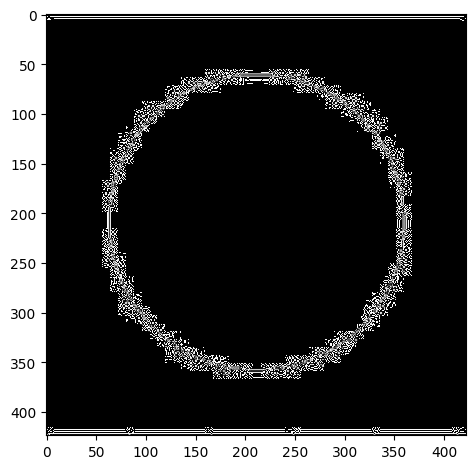

In [ ]:
laplace = laplace_filter()
step = 1
padding = 0

convolved = stepping_convolution(image,laplace,step,padding)
_ = io.imshow(convolved)

In [ ]:
image = io.imread('/content/redPanda.jpg')


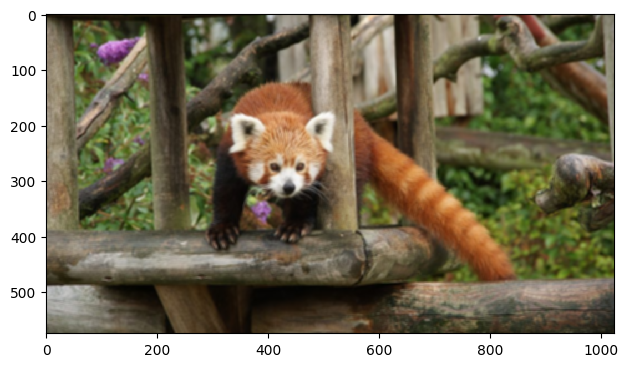

In [ ]:
m_blur_kernel_size = 5

m_blur_kernel = mean_blur_kernel(m_blur_kernel_size)

blured_image = convolve_with_stride(image, m_blur_kernel)
_ = io.imshow(blured_image)


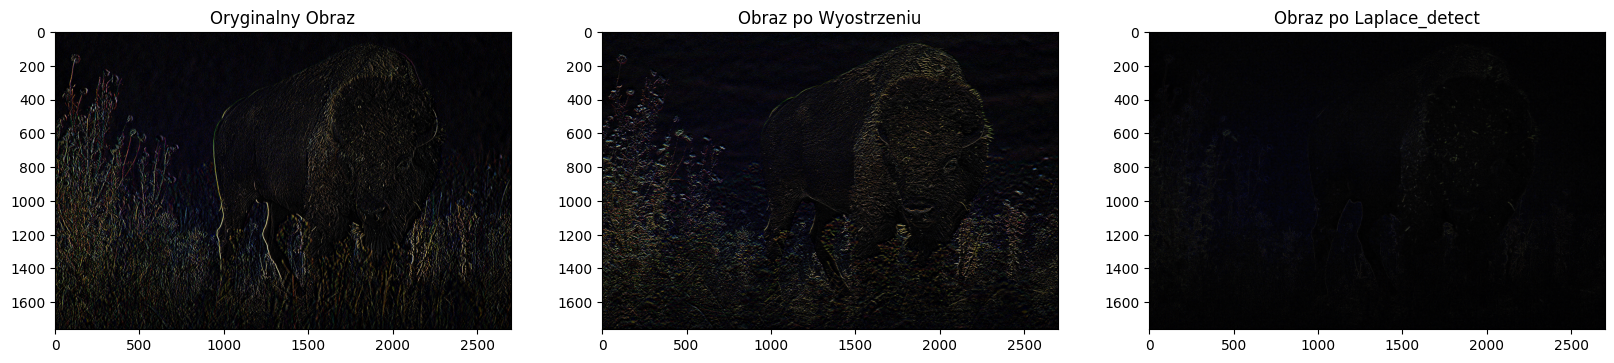

In [ ]:
import cv2
# cv::filter2D (InputArray src, OutputArray dst, int ddepth, InputArray kernel, Point anchor=Point(-1,-1), double delta=0, int borderType=BORDER_DEFAULT)
import matplotlib.pyplot as plt

image1 = io.imread('/content/Bison.jpg')
image2 = io.imread('/content/Bison.jpg')
image3 = io.imread('/content/Bison.jpg')

Sobel_x = np.array(
    [  [1, 0, -1],
       [2, 0, -2],
       [1, 0, -1]])

Sobel_y = np.array(
    [  [ 1, 2, 1],
       [ 0, 0, 0],
       [-1,-2,-1]])

Laplace_kernel = np.array(
    [  [0, 1, 0],
       [1, -4, 1],
       [0, 1, 0]])


# Stosowanie konwolucji na obrazie
Sobel_x_detect = cv2.filter2D(image1, -1, Sobel_x)
Sobel_y_detect = cv2.filter2D(image2, -1, Sobel_y)
Laplace_detect = cv2.filter2D(image3, -1, Laplace_kernel) # - doesn't work properly. Need to solve.


# Wyświetlenie oryginalnego i wyostrzonego obrazu
plt.figure(figsize=(20, 20))

plt.subplot(1, 3, 1)
plt.imshow(Sobel_x_detect)
plt.title("Oryginalny Obraz")

plt.subplot(1, 3, 2)
plt.imshow(Sobel_y_detect)
plt.title("Obraz po Wyostrzeniu")

plt.subplot(1, 3, 3)
plt.imshow(Laplace_detect)
plt.title("Obraz po Laplace_detect")

plt.show()

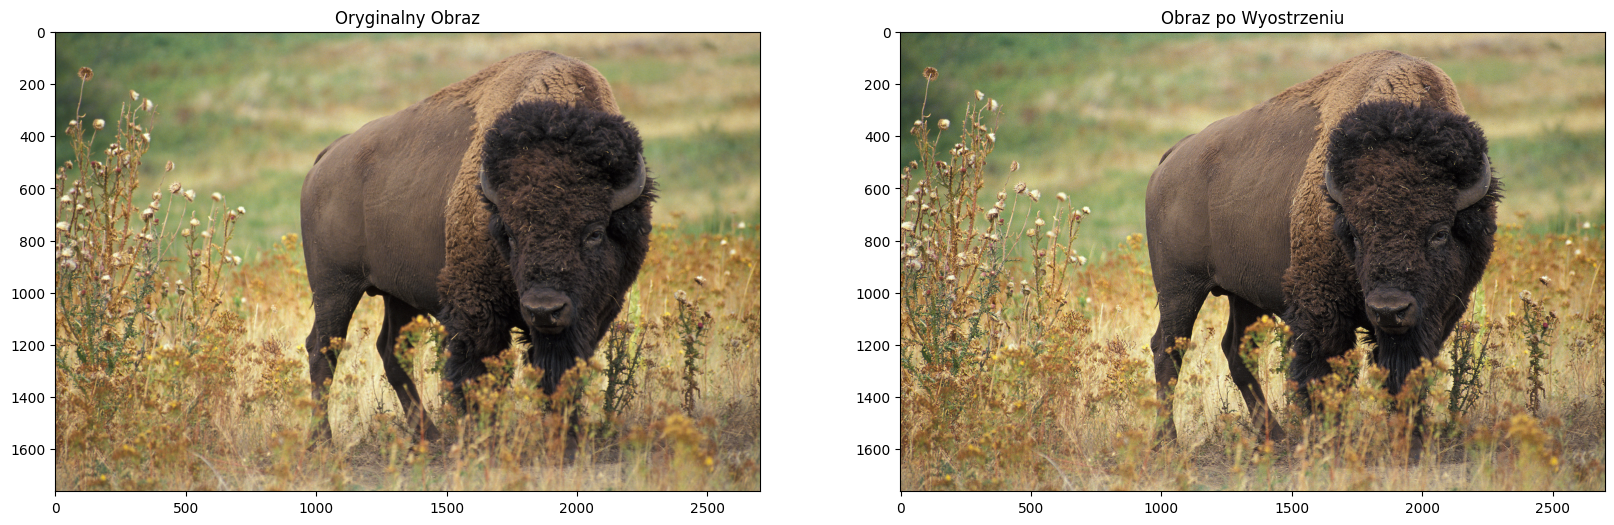

In [ ]:
image_to_sharpen = io.imread('/content/Bison.jpg')

# Sharpen kernel
sharpen_kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# Stosowanie konwolucja przy użyciu cv2
sharpened_image = cv2.filter2D(image_to_sharpen, -1, sharpen_kernel)


# Wyświetlenie oryginalnego i wyostrzonego obrazu
plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(image_to_sharpen)
plt.title("Oryginalny Obraz")

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image)
plt.title("Obraz po Wyostrzeniu")

plt.show()